# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data_df = pd.merge(study_results_df, mouse_metadata_df, on=["Mouse ID", "Mouse ID"], how="left")

# Display the data table for preview
mouse_study_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_id = mouse_study_data_df["Mouse ID"].describe()['unique']
mouse_id

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouse_id = mouse_study_data_df[["Mouse ID", "Timepoint"]].value_counts()
dup_mouse_id

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Name: count, Length: 1888, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_g989 = mouse_study_data_df[mouse_study_data_df["Mouse ID"] == 'g989']
dup_i334 = mouse_study_data_df[mouse_study_data_df["Mouse ID"] == 'i334']
dup_z969 = mouse_study_data_df[mouse_study_data_df["Mouse ID"] == 'z969']
dup_g989
#dup_i334
#dup_z969

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_data_df = mouse_study_data_df[mouse_study_data_df["Mouse ID"] != "g989"]
mouse_study_data_df = mouse_study_data_df[mouse_study_data_df["Mouse ID"] != "i334"]
mouse_study_data_df = mouse_study_data_df[mouse_study_data_df["Mouse ID"] != "z969"]
mouse_study_data_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_id = mouse_study_data_df["Mouse ID"].describe()['unique']
mouse_id

246

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped_drug_regimen = mouse_study_data_df.groupby(["Drug Regimen"])

avg_tumor_vol = grouped_drug_regimen["Tumor Volume (mm3)"].mean()
med_tumor_vol = grouped_drug_regimen["Tumor Volume (mm3)"].median()
var_tumor_vol = grouped_drug_regimen["Tumor Volume (mm3)"].var()
std_tumor_vol = grouped_drug_regimen["Tumor Volume (mm3)"].std()
sem_tumor_vol = grouped_drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
statistics_summary = pd.DataFrame({"Mean Tumor Volume": avg_tumor_vol,
                                     "Median Tumor Volume": med_tumor_vol,
                                     "Tumor Volume Variance": var_tumor_vol,
                                     "Tumor Volume Std. Dev.": std_tumor_vol,
                                     "Tumor Volume Std. Err.": sem_tumor_vol})
statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,53.998435,51.938261,63.012382,7.938034,0.598352
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.225135,40.766295,24.351088,4.934682,0.334219
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_method = grouped_drug_regimen.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
agg_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              53.998435  51.938261  63.012382  7.938034  0.598352
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.225135  40.766295  24.351088  4.934682  0.334219
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

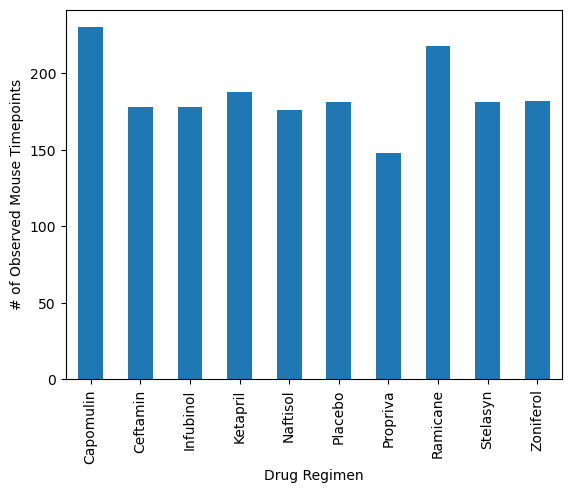

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_timepoint = grouped_drug_regimen["Timepoint"].count()
drug_timepoint_chart = drug_timepoint.plot(kind='bar', xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

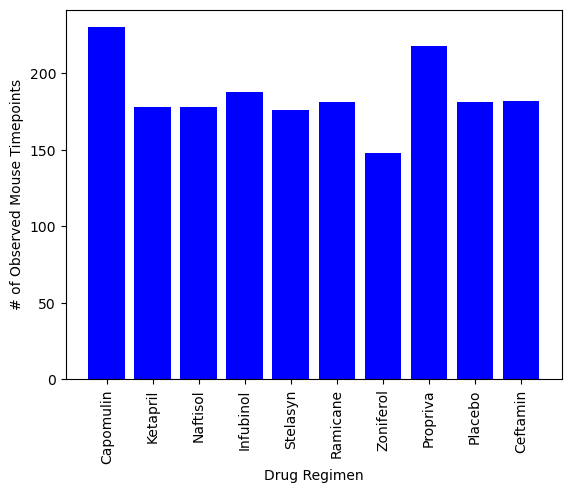

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = mouse_study_data_df["Drug Regimen"].unique()

x_axis = np.arange(len(drug_timepoint))

plt.bar(x_axis, drug_timepoint, color='b', align='edge')

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation='vertical')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

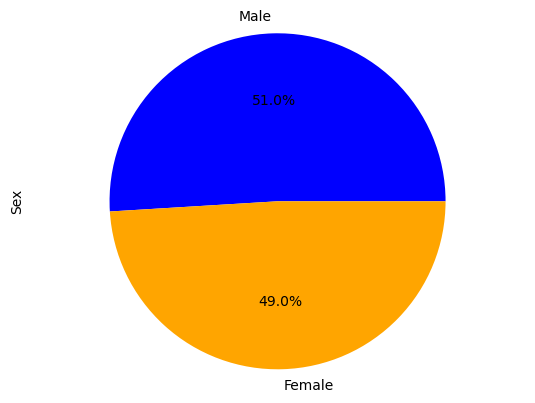

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = mouse_study_data_df["Sex"].value_counts()
labels = ['Male', 'Female']
colors = ['blue', 'orange']

gender_pie = gender.plot(kind='pie', y=gender, labels=labels, colors=colors, autopct='%1.1f%%')
gender_pie.set_ylabel("Sex")

plt.axis('equal')
plt.show()

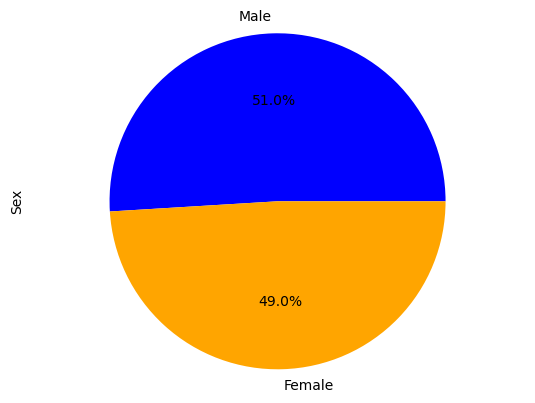

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = mouse_study_data_df["Sex"].value_counts()
labels = ['Male', 'Female']
colors = ['blue', 'orange']

plt.pie(gender, labels=labels, colors=colors, autopct='%1.1f%%')

plt.axis('equal')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_drug_regimen = mouse_study_data_df[mouse_study_data_df["Drug Regimen"].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = last_drug_regimen.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study_data_merged_df = pd.merge(last_timepoint, mouse_study_data_df, on=["Mouse ID", "Timepoint"], how='inner')
mouse_study_data_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#see summary stats solution
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
mouse_tumor_vol = mouse_study_data_merged_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
    
 # add subset 
for treatment in treatment_regimens:
    subset = mouse_tumor_vol.loc[mouse_tumor_vol["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(subset)
    
    quartiles = subset.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
     # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    potential_outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {potential_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


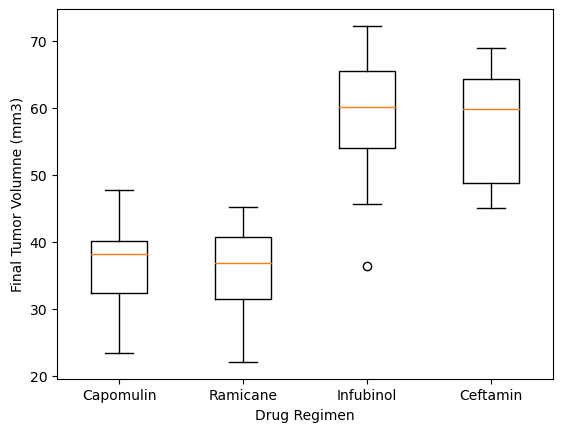

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volumne (mm3)")
plt.plot(markerfacecolor='red')
plt.show()

## Line and Scatter Plots

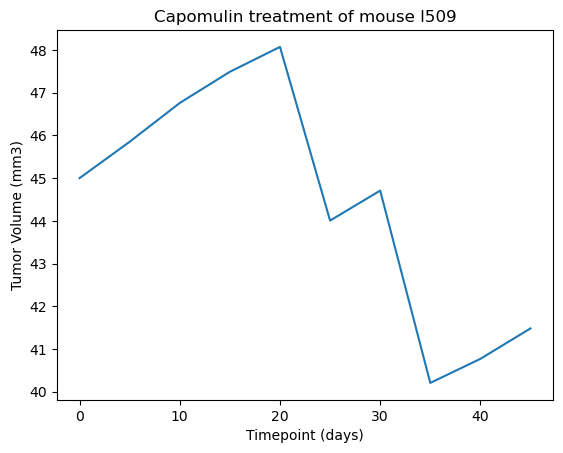

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = mouse_study_data_df[mouse_study_data_df["Drug Regimen"] == "Capomulin"]
mouse_id = "l509"
capomulin_mouse = capomulin[capomulin["Mouse ID"] == mouse_id]

plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.show()

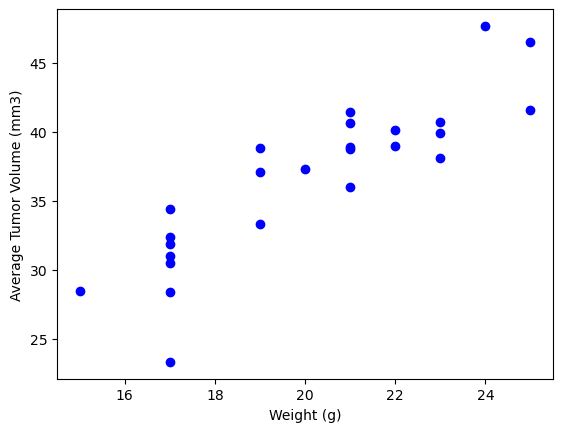

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = mouse_study_data_merged_df[mouse_study_data_merged_df["Drug Regimen"] == "Capomulin"]
avg_tumor_vol = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_weight = capomulin.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(mouse_weight, avg_tumor_vol, marker='o', facecolors='blue')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.88


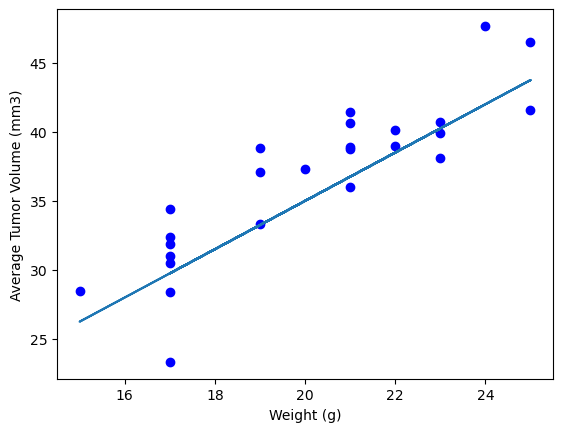

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(mouse_weight,avg_tumor_vol)[0],2)}")

regression = linregress(mouse_weight, avg_tumor_vol)
slope = regression.slope
intercept = regression.intercept

plt.scatter(mouse_weight, avg_tumor_vol, marker='o', facecolors='blue')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(mouse_weight, slope * mouse_weight)

plt.show()
